In [31]:
'''
NLP-assignment-1
Chauhan Jainish
17110038
'''

import nltk,csv,numpy
import re
import collections
import matplotlib.pyplot as plt 
import math 
from nltk.corpus import wordnet  
from scipy.optimize import curve_fit 
nltk.download('wordnet')

from nltk import word_tokenize, pos_tag
reader = csv.reader(open('tweets-dataset.csv'), delimiter= ",",quotechar='|')
tokens=[]
for line in reader:
    for field in line:
        line_tokens_raw=re.sub('[^A-Za-z]+', ' ', field)
        line_tokens=word_tokenize(line_tokens_raw)
        for i in line_tokens:
            tokens.append(i)
typee=set(tokens)
print("Ans-1:")
print ("No. of tokens = " + str(len(tokens)))
print ("No. of types = " + str(len(typee)))
print ("TTR = " + str(len(typee)/len(tokens)))


[nltk_data] Downloading package wordnet to /Users/jainish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ans-1:
No. of tokens = 329312
No. of types = 45852
TTR = 0.13923573996696142


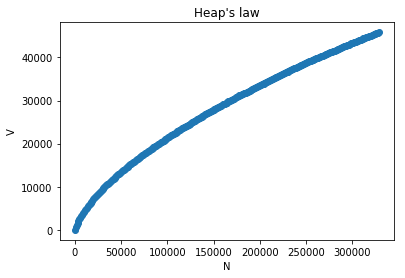

Ans-3: Beta = 0.6513678043912512, K= 11.776259871979986


In [36]:
corpus=[i for i in range(0,329312,1000)]
vocab=[len(set(tokens[0:i])) for i in corpus]
def test(corpus, K, beta): 
    return K*(corpus**beta)
param, param_cov = curve_fit(test, corpus, vocab) 

plt.scatter(corpus,vocab)
plt.title("Heap's law")
plt.xlabel("N")
plt.ylabel("V")
plt.show()

print("Ans-3: Beta = "+str(param[1])+", K= "+str(param[0]))

Ans-2a: m = 5.67 * f^0.3369394914703158


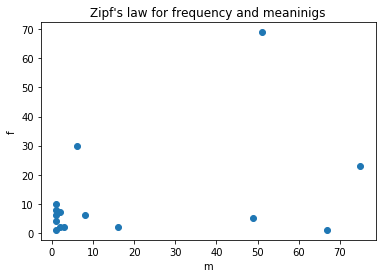

In [37]:
tokens_count={ }
for word in tokens:
    if word not in tokens_count:
        tokens_count[word]=1
    else:
        tokens_count[word]=tokens_count[word]+1

sorted_dict = sorted(tokens_count.items(), key=lambda kv: kv[1])
sp_list=[sorted_dict[0],sorted_dict[45011],sorted_dict[30000],sorted_dict[34250],sorted_dict[45230],sorted_dict[45050],sorted_dict[40111],sorted_dict[200],sorted_dict[23459],sorted_dict[43498],sorted_dict[41200],sorted_dict[14289],sorted_dict[32200],sorted_dict[11200],sorted_dict[45292]]
frequencies=[]
meanings=[]
for i in sp_list:
    frequencies.append(tokens_count[i[0]])
    synonyms = []  
    for syn in wordnet.synsets(i[0]): 
        for l in syn.lemmas(): 
            synonyms.append(l.name())
    meanings.append(len(set(synonyms)))

def test(frequencies, a, b): 
    return a*(frequencies**b)
param, param_cov = curve_fit(test, frequencies, meanings)    

plt.scatter(frequencies, meanings)
plt.title("Zipf's law for frequency and meaninigs")
plt.xlabel("m")
plt.ylabel("f")

print("Ans-2a: m = 5.67 * f^"+str(param[1]))

Ans: f*l = [52.98006593]


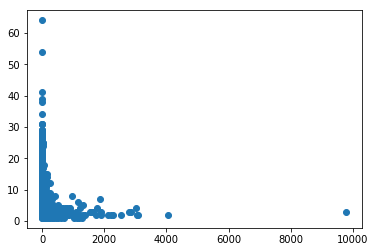

In [30]:
lengths=[]
freq=[]
for i in sorted_dict:
    lengths.append(len(i[0]))
    freq.append(tokens_count[i[0]])
    
def test(lengths, a): 
    return a/lengths
param, param_cov = curve_fit(test, lengths, freq)

plt.scatter(freq,lengths)
plt.title("Zipf's law for frq")
plt.xlabel("N")
plt.ylabel("V")

print ("Ans-2b: f*l = "+str(param))